[*********************100%%**********************]  1 of 1 completed


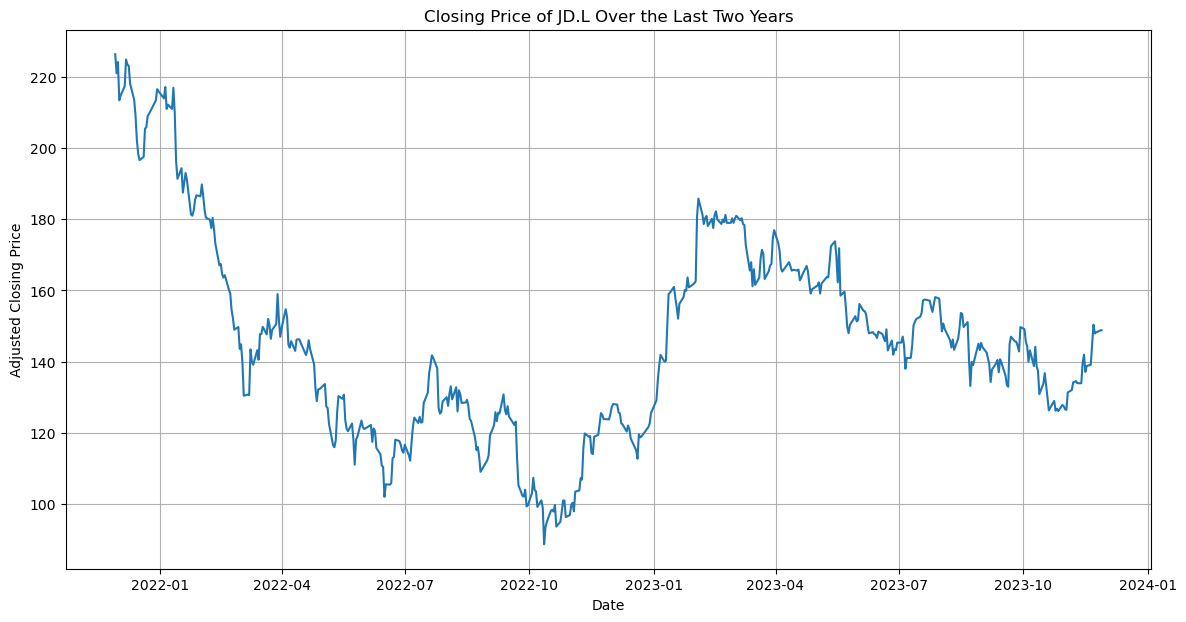

           count        mean        std        min         25%         50%  \
Adj Close  503.0  145.645786  28.086328  88.697044  125.413845  143.557739   

                 75%         max  annualized_return  annualized_std_dev  
Adj Close  161.72554  226.341385          -0.120224            0.425218  


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

stock_symbol = "JD.L"
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365) 

data = yf.download(stock_symbol, start=start_date, end=end_date)

data['Daily Return'] = data['Adj Close'].pct_change()


annualized_avg_return = data['Daily Return'].mean() * 252

annualized_std_dev = data['Daily Return'].std() * np.sqrt(252)

plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'])
plt.title(f'Closing Price of {stock_symbol} Over the Last Two Years')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.grid(True)
plt.show()

descriptive_stats = data['Adj Close'].describe()
descriptive_stats['annualized_return'] = annualized_avg_return
descriptive_stats['annualized_std_dev'] = annualized_std_dev

descriptive_stats_table = pd.DataFrame(descriptive_stats).T

print(descriptive_stats_table)

[*********************100%%**********************]  1 of 1 completed


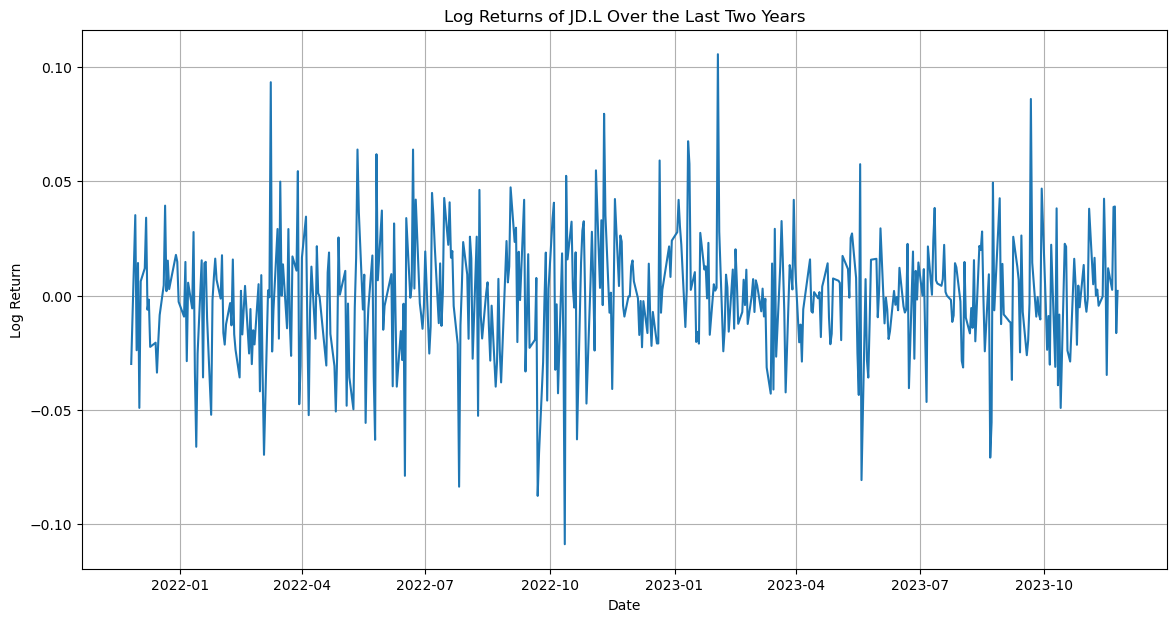

,count,mean,std,min,25%,50%,75%,max,annualized_return,annualized_std_dev
Log Return,502.0,-0.000833,0.026881,-0.108875,-0.016683,-0.000681,0.014716,0.105667,-0.209939,0.426724


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

stock_symbol = "JD.L"
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365) 

data = yf.download(stock_symbol, start=start_date, end=end_date)

data['Log Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

annualized_avg_log_return = data['Log Return'].mean() * 252

annualized_std_dev_log = data['Log Return'].std() * np.sqrt(252)

plt.figure(figsize=(14, 7))
plt.plot(data['Log Return'])
plt.title(f'Log Returns of {stock_symbol} Over the Last Two Years')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

descriptive_stats_log = data['Log Return'].describe()
descriptive_stats_log['annualized_return'] = annualized_avg_log_return
descriptive_stats_log['annualized_std_dev'] = annualized_std_dev_log

descriptive_stats_table_log = pd.DataFrame(descriptive_stats_log).T

descriptive_stats_table_log


In [18]:
import yfinance as yf
import numpy as np


ticker_symbol = 'JD'
stock_data = yf.download(ticker_symbol, period='1y', interval='1d')


log_return = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))


volatility = log_return.std() * np.sqrt(252)


current_stock_price = stock_data['Adj Close'][-1]

print(f"Current Stock Price: {current_stock_price}")
print(f"Annualized Volatility: {volatility}")


[*********************100%%**********************]  1 of 1 completed
Current Stock Price: 28.760000228881836
Annualized Volatility: 0.485364118367793


                 Parameter         Value  \
0  Current Stock Price (S)     28.760000   
1         Strike Price (K)     30.000000   
2   Time to Expiration (T)      1.000000   
3       Risk-Free Rate (r)      0.010000   
4           Volatility (σ)      0.485364   
5    Number of Simulations  10000.000000   

                                         Description  
0                      Price of the underlying asset  
1         Price at which the option can be exercised  
2  Time remaining until the option expires, in years  
3                     Annual risk-free interest rate  
4           Annual volatility of the stock’s returns  
5      Number of paths in the Monte Carlo simulation  

Black-Scholes Model:


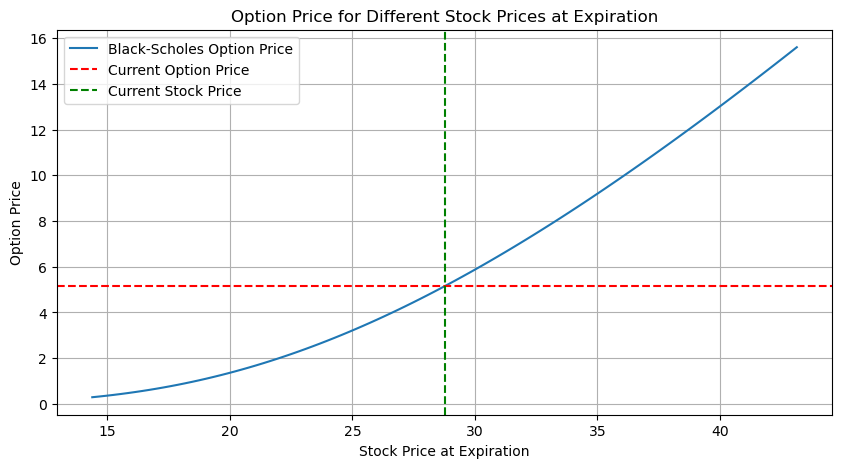

The Black-Scholes option price is: 5.146295741148139

Monte Carlo Simulation:


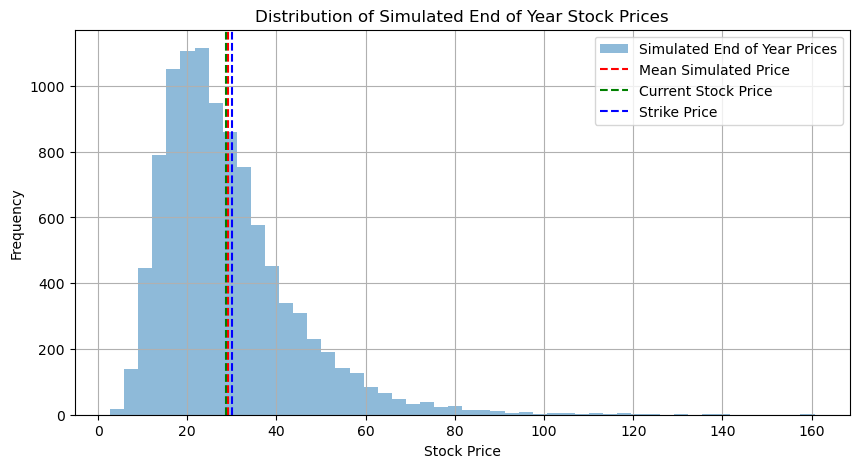

                         Metric      Value
0           Current Stock Price  28.760000
1                  Strike Price  30.000000
2  Option Price (MC Simulation)   5.129509
3          Mean Simulated Price  29.061131


In [20]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt


def black_scholes_option_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def black_scholes_with_plot(S, K, T, r, sigma):
    option_price = black_scholes_option_price(S, K, T, r, sigma)
    S_values = np.linspace(0.5 * S, 1.5 * S, 100)
    bs_prices = np.array([black_scholes_option_price(s, K, T, r, sigma) for s in S_values])
    plt.figure(figsize=(10, 5))
    plt.plot(S_values, bs_prices, label='Black-Scholes Option Price')
    plt.axhline(y=option_price, color='r', linestyle='--', label='Current Option Price')
    plt.axvline(x=S, color='g', linestyle='--', label='Current Stock Price')
    plt.title('Option Price for Different Stock Prices at Expiration')
    plt.xlabel('Stock Price at Expiration')
    plt.ylabel('Option Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    return option_price

def monte_carlo_option_price(S, K, T, r, sigma, num_simulations=10000):
    dt = 1/252
    price_paths = np.zeros((num_simulations, int(T * 252)))
    price_paths[:, 0] = S
    for t in range(1, int(T * 252)):
        z = np.random.standard_normal(num_simulations)
        price_paths[:, t] = price_paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    payoffs = np.maximum(price_paths[:, -1] - K, 0)
    option_price = np.mean(payoffs) * np.exp(-r * T)
    return option_price, price_paths

def monte_carlo_with_plot_and_table(S, K, T, r, sigma, num_simulations=10000):
    option_price, price_paths = monte_carlo_option_price(S, K, T, r, sigma, num_simulations)
    plt.figure(figsize=(10, 5))
    plt.hist(price_paths[:, -1], bins=50, alpha=0.5, label='Simulated End of Year Prices')
    plt.axvline(x=np.mean(price_paths[:, -1]), color='r', linestyle='--', label='Mean Simulated Price')
    plt.axvline(x=S, color='g', linestyle='--', label='Current Stock Price')
    plt.axvline(x=K, color='b', linestyle='--', label='Strike Price')
    plt.title('Distribution of Simulated End of Year Stock Prices')
    plt.xlabel('Stock Price')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()
    results_table = pd.DataFrame({
        'Metric': ['Current Stock Price', 'Strike Price', 'Option Price (MC Simulation)', 'Mean Simulated Price'],
        'Value': [S, K, option_price, np.mean(price_paths[:, -1])]
    })
    return option_price, results_table

def create_input_data_table(S, K, T, r, sigma, num_simulations):
    input_data = {
        'Parameter': ['Current Stock Price (S)', 'Strike Price (K)', 'Time to Expiration (T)',
                      'Risk-Free Rate (r)', 'Volatility (σ)', 'Number of Simulations'],
        'Value': [S, K, T, r, sigma, num_simulations],
        'Description': ['Price of the underlying asset', 'Price at which the option can be exercised',
                        'Time remaining until the option expires, in years', 'Annual risk-free interest rate',
                        'Annual volatility of the stock’s returns', 'Number of paths in the Monte Carlo simulation']
    }
    return pd.DataFrame(input_data)


S = 28.76  
K = 30.0   
T = 1.0    
r = 0.01 
sigma = 0.485364118367793  
num_simulations = 10000  


input_data_table = create_input_data_table(S, K, T, r, sigma, num_simulations)
print(input_data_table)

print("\nBlack-Scholes Model:")
bs_price = black_scholes_with_plot(S, K, T, r, sigma)
print(f"The Black-Scholes option price is: {bs_price}\n")

print("Monte Carlo Simulation:")
mc_price, mc_table = monte_carlo_with_plot_and_table(S, K, T, r, sigma, num_simulations)
print(mc_table)


Model Input Parameters:
              Parameter        Value                                       Description
Current Stock Price (S)    28.760000                     Price of the underlying asset
       Strike Price (K)    30.000000        Price at which the option can be exercised
 Time to Expiration (T)     1.000000 Time remaining until the option expires, in years
     Risk-Free Rate (r)     0.010000                    Annual risk-free interest rate
         Volatility (σ)     0.485364          Annual volatility of the stock’s returns
  Number of Simulations 10000.000000     Number of paths in the Monte Carlo simulation

Black-Scholes Model:


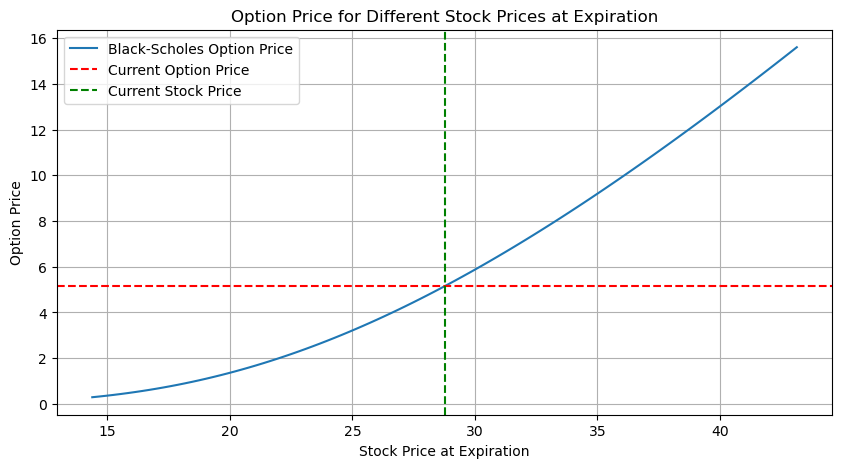

The Black-Scholes option price is: 5.15

Monte Carlo Simulation:


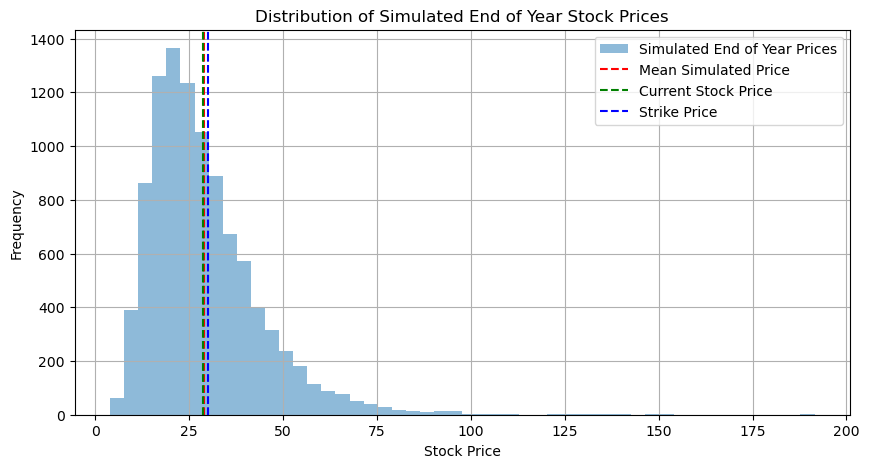

The Monte Carlo option price is: 5.11

                      Metric     Value
         Current Stock Price 28.760000
                Strike Price 30.000000
Option Price (MC Simulation)  5.109018
        Mean Simulated Price 29.035291


In [22]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

def black_scholes_option_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def black_scholes_with_plot(S, K, T, r, sigma):
    option_price = black_scholes_option_price(S, K, T, r, sigma)
    S_values = np.linspace(0.5 * S, 1.5 * S, 100)
    bs_prices = np.array([black_scholes_option_price(s, K, T, r, sigma) for s in S_values])
    plt.figure(figsize=(10, 5))
    plt.plot(S_values, bs_prices, label='Black-Scholes Option Price')
    plt.axhline(y=option_price, color='r', linestyle='--', label='Current Option Price')
    plt.axvline(x=S, color='g', linestyle='--', label='Current Stock Price')
    plt.title('Option Price for Different Stock Prices at Expiration')
    plt.xlabel('Stock Price at Expiration')
    plt.ylabel('Option Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    return option_price

def monte_carlo_option_price(S, K, T, r, sigma, num_simulations=10000):
    dt = 1/252
    price_paths = np.zeros((num_simulations, int(T * 252)))
    price_paths[:, 0] = S
    for t in range(1, int(T * 252)):
        z = np.random.standard_normal(num_simulations)
        price_paths[:, t] = price_paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    payoffs = np.maximum(price_paths[:, -1] - K, 0)
    option_price = np.mean(payoffs) * np.exp(-r * T)
    return option_price, price_paths

def monte_carlo_with_plot_and_table(S, K, T, r, sigma, num_simulations=10000):
    option_price, price_paths = monte_carlo_option_price(S, K, T, r, sigma, num_simulations)
    plt.figure(figsize=(10, 5))
    plt.hist(price_paths[:, -1], bins=50, alpha=0.5, label='Simulated End of Year Prices')
    plt.axvline(x=np.mean(price_paths[:, -1]), color='r', linestyle='--', label='Mean Simulated Price')
    plt.axvline(x=S, color='g', linestyle='--', label='Current Stock Price')
    plt.axvline(x=K, color='b', linestyle='--', label='Strike Price')
    plt.title('Distribution of Simulated End of Year Stock Prices')
    plt.xlabel('Stock Price')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()
    results_table = pd.DataFrame({
        'Metric': ['Current Stock Price', 'Strike Price', 'Option Price (MC Simulation)', 'Mean Simulated Price'],
        'Value': [S, K, option_price, np.mean(price_paths[:, -1])]
    })
    print(f"The Monte Carlo option price is: {option_price:.2f}\n")
    return option_price, results_table

def create_input_data_table(S, K, T, r, sigma, num_simulations):
    input_data = {
        'Parameter': ['Current Stock Price (S)', 'Strike Price (K)', 'Time to Expiration (T)',
                      'Risk-Free Rate (r)', 'Volatility (σ)', 'Number of Simulations'],
        'Value': [S, K, T, r, sigma, num_simulations],
        'Description': ['Price of the underlying asset', 'Price at which the option can be exercised',
                        'Time remaining until the option expires, in years', 'Annual risk-free interest rate',
                        'Annual volatility of the stock’s returns', 'Number of paths in the Monte Carlo simulation']
    }
    return pd.DataFrame(input_data)


S = 28.76  
K = 30.0   
T = 1.0    
r = 0.01   
sigma = 0.485364118367793  
num_simulations = 10000  

input_data_table = create_input_data_table(S, K, T, r, sigma, num_simulations)
print("Model Input Parameters:")
print(input_data_table.to_string(index=False))

print("\nBlack-Scholes Model:")
bs_price = black_scholes_with_plot(S, K, T, r, sigma)
print(f"The Black-Scholes option price is: {bs_price:.2f}\n")

print("Monte Carlo Simulation:")
mc_price, mc_table = monte_carlo_with_plot_and_table(S, K, T, r, sigma, num_simulations)
print(mc_table.to_string(index=False))


Monte Carlo Simulation:


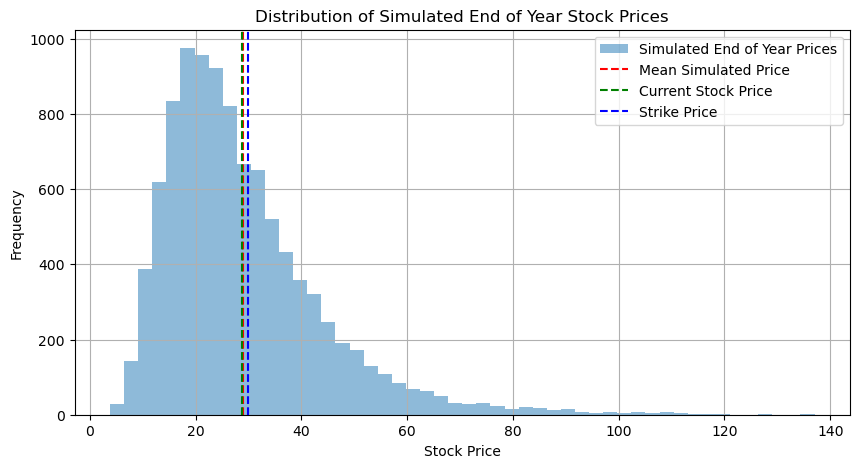

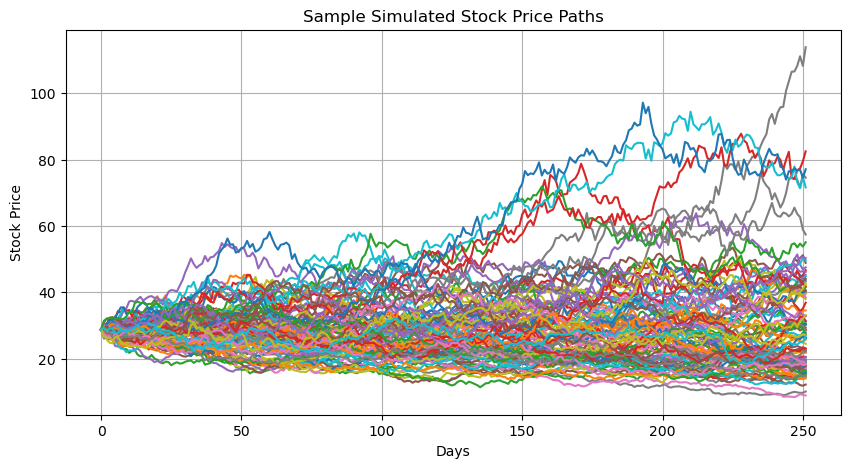

The Monte Carlo option price is: 5.19

                      Metric     Value
         Current Stock Price 28.760000
                Strike Price 30.000000
Option Price (MC Simulation)  5.186342
        Mean Simulated Price 29.000680


In [24]:

def monte_carlo_with_plots_and_table(S, K, T, r, sigma, num_simulations=10000, num_paths_to_show=100):
    option_price, price_paths = monte_carlo_option_price(S, K, T, r, sigma, num_simulations)

   
    plt.figure(figsize=(10, 5))
    plt.hist(price_paths[:, -1], bins=50, alpha=0.5, label='Simulated End of Year Prices')
    plt.axvline(x=np.mean(price_paths[:, -1]), color='r', linestyle='--', label='Mean Simulated Price')
    plt.axvline(x=S, color='g', linestyle='--', label='Current Stock Price')
    plt.axvline(x=K, color='b', linestyle='--', label='Strike Price')
    plt.title('Distribution of Simulated End of Year Stock Prices')
    plt.xlabel('Stock Price')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    for i in range(min(num_paths_to_show, num_simulations)):
        plt.plot(price_paths[i, :], label=f'Path {i+1}' if i < num_paths_to_show else None)
    plt.title('Sample Simulated Stock Price Paths')
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()

    results_table = pd.DataFrame({
        'Metric': ['Current Stock Price', 'Strike Price', 'Option Price (MC Simulation)', 'Mean Simulated Price'],
        'Value': [S, K, option_price, np.mean(price_paths[:, -1])]
    })
    print(f"The Monte Carlo option price is: {option_price:.2f}\n")
    return option_price, results_table

print("Monte Carlo Simulation:")
mc_price, mc_table = monte_carlo_with_plots_and_table(S, K, T, r, sigma, num_simulations)
print(mc_table.to_string(index=False))



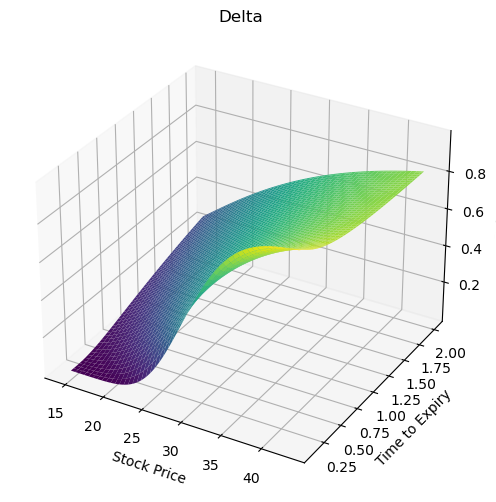

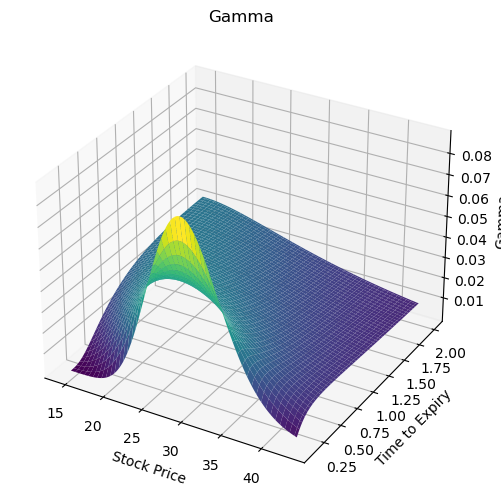

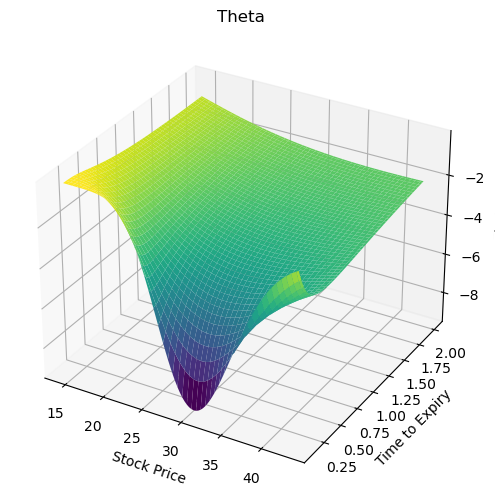

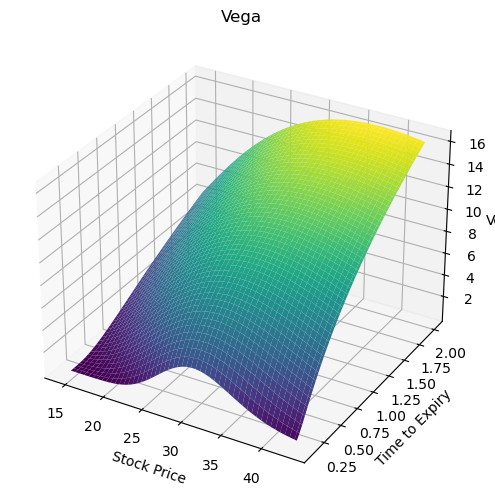

   Greek      Value Dependent Variable         Independent Variables
0  Delta   0.569977       Option Price  Stock Price & Time to Expiry
1  Gamma   0.028139              Delta  Stock Price & Time to Expiry
2  Theta  -2.853949       Option Price  Stock Price & Time to Expiry
3   Vega  11.296618       Option Price  Stock Price & Time to Expiry


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D


def calculate_greeks(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = -((S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))) - r * K * np.exp(-r * T) * norm.cdf(d2)
    vega = S * np.sqrt(T) * norm.pdf(d1)
    return delta, gamma, theta, vega

S = 28.76  
K = 30.0  
r = 0.01   
sigma = 0.485364118367793  

S_range = np.linspace(0.5 * S, 1.5 * S, 100)
T_range = np.linspace(0.1, 2, 100)

S_grid, T_grid = np.meshgrid(S_range, T_range)
delta_grid = np.zeros_like(S_grid)
gamma_grid = np.zeros_like(S_grid)
theta_grid = np.zeros_like(S_grid)
vega_grid = np.zeros_like(S_grid)

for i in range(S_grid.shape[0]):
    for j in range(S_grid.shape[1]):
        delta_grid[i, j], gamma_grid[i, j], theta_grid[i, j], vega_grid[i, j] = calculate_greeks(S_grid[i, j], K, T_grid[i, j], r, sigma)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(S_grid, T_grid, delta_grid, cmap='viridis')
ax.set_title('Delta')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(S_grid, T_grid, gamma_grid, cmap='viridis')
ax.set_title('Gamma')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
plt.show()


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(S_grid, T_grid, theta_grid, cmap='viridis')
ax.set_title('Theta')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
plt.show()


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(S_grid, T_grid, vega_grid, cmap='viridis')
ax.set_title('Vega')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
plt.show()


greeks_data = [
    ['Delta', delta, 'Option Price', 'Stock Price & Time to Expiry'],
    ['Gamma', gamma, 'Delta', 'Stock Price & Time to Expiry'],
    ['Theta', theta, 'Option Price', 'Stock Price & Time to Expiry'],
    ['Vega', vega, 'Option Price', 'Stock Price & Time to Expiry']
]
greeks_table = pd.DataFrame(greeks_data, columns=['Greek', 'Value', 'Dependent Variable', 'Independent Variables'])
print(greeks_table)


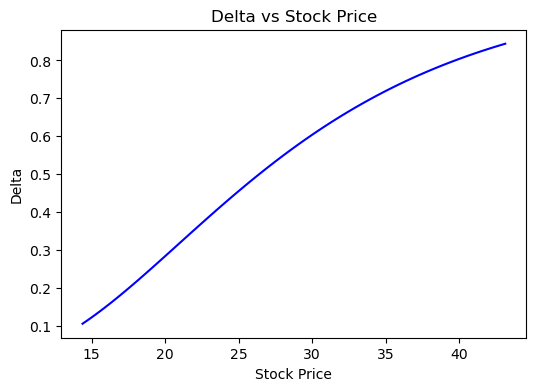

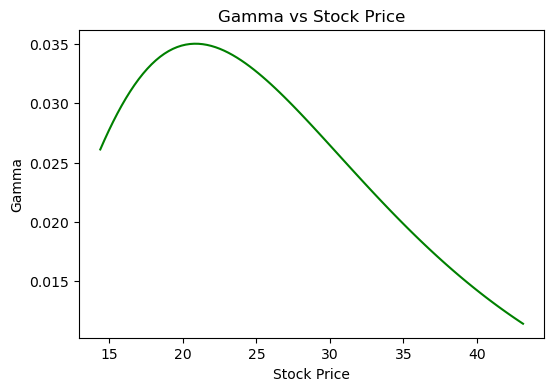

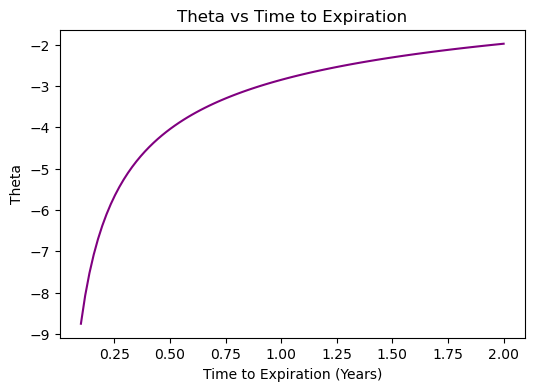

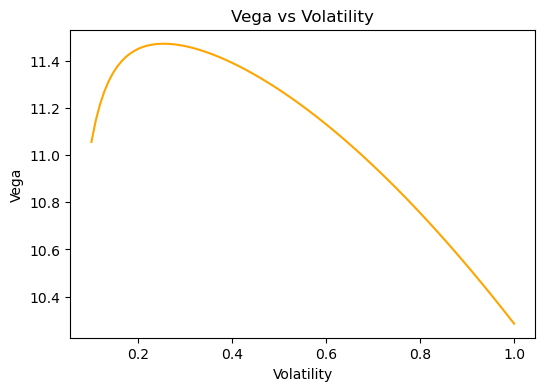

Delta: 0.5699770362725065
Gamma: 0.0281386340665531
Theta: -2.8539489494452113
Vega: 11.296617971859682
   Greek      Value Dependent Variable Independent Variable
0  Delta   0.569977       Option Price          Stock Price
1  Gamma   0.028139              Delta          Stock Price
2  Theta  -2.853949       Option Price                 Time
3   Vega  11.296618       Option Price           Volatility


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


def calculate_greeks(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = -((S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))) - r * K * np.exp(-r * T) * norm.cdf(d2)
    vega = S * np.sqrt(T) * norm.pdf(d1)
    return delta, gamma, theta, vega


S = 28.76  
K = 30.0  
T = 1.0    
r = 0.01   
sigma = 0.485364118367793  

delta, gamma, theta, vega = calculate_greeks(S, K, T, r, sigma)


S_range = np.linspace(0.5 * S, 1.5 * S, 100)
T_range = np.linspace(0.1, 2, 100)
sigma_range = np.linspace(0.1, 1, 100)


deltas = [calculate_greeks(S_val, K, T, r, sigma)[0] for S_val in S_range]
gammas = [calculate_greeks(S_val, K, T, r, sigma)[1] for S_val in S_range]
thetas = [calculate_greeks(S, K, T_val, r, sigma)[2] for T_val in T_range]
vegas = [calculate_greeks(S, K, T, r, sigma_val)[3] for sigma_val in sigma_range]

plt.figure(figsize=(6, 4))
plt.plot(S_range, deltas, label='Delta', color='blue')
plt.title('Delta vs Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.show()


plt.figure(figsize=(6, 4))
plt.plot(S_range, gammas, label='Gamma', color='green')
plt.title('Gamma vs Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.show()


plt.figure(figsize=(6, 4))
plt.plot(T_range, thetas, label='Theta', color='purple')
plt.title('Theta vs Time to Expiration')
plt.xlabel('Time to Expiration (Years)')
plt.ylabel('Theta')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(sigma_range, vegas, label='Vega', color='orange')
plt.title('Vega vs Volatility')
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.show()


print(f"Delta: {delta}")
print(f"Gamma: {gamma}")
print(f"Theta: {theta}")
print(f"Vega: {vega}")


greeks_data = [
    ['Delta', delta, 'Option Price', 'Stock Price'],
    ['Gamma', gamma, 'Delta', 'Stock Price'],
    ['Theta', theta, 'Option Price', 'Time'],
    ['Vega', vega, 'Option Price', 'Volatility']
]
greeks_table = pd.DataFrame(greeks_data, columns=['Greek', 'Value', 'Dependent Variable', 'Independent Variable'])
print(greeks_table)
